In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=";")

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Vamos carregar a base, e verificar se os tipos de dados estão de acordo com cada coluna e caso não estejam, vamos realizar a transformação dos tipos de dados

In [7]:
df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

# 2 - Vamos fazer isso por etapas:
A) Vamos verificar se temos colunas com dados faltantes e trazer a % dos dados faltantes por coluna.

In [8]:
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Excluimos nessa etapa as linhas das colunas com dados faltantes que Eu analisei que esse método é o ideal. E vamos Justificar o motivo de estar excluindo essas linhas.

In [9]:
# Vemos que a categoria Genero ela tem apenas 0,4% dos nulos, pelo fato de ser um dado delicado e é algo que não vai ajudar tanto no aprendizagem de maquina o ideal é excluir
df.dropna(subset=["Genero"], inplace=True)

C) Nessa etapa iremos substituir pela média, mediana ou moda as linhas das colunas com valores faltantes que eu analisei e entendi que esse era o melhor método. E vamos justificar nossa escolha.

In [12]:
df.isnull().sum()

customerID               0
Genero                   0
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1482
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal       313
Total_Pago               0
Churn                    0
dtype: int64

**Vejo logo acima nas porcentagens que pelo fato de não se ter uma categoria como " Países " para fazer um gráfico junto com a categoria " Churn ", será dificil encontrar algo que vá afetar lá na frente.** 

**Acredito que isso não ira afetar a analise, fora que apenas vejo 0,2% de dados nulos, então também podemos excluir**


In [14]:
(df.isnull().sum() / len(df)) * 100

customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
PhoneService          59.565916
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal      12.580386
Total_Pago             0.000000
Churn                  0.000000
dtype: float64

In [111]:
# Agora vamos analisar a média sobre pagamento mensal 
df["Pagamento_Mensal"].mean()

66.2765172829582

In [16]:
# Agora a Mediana
df["Pagamento_Mensal"].median()

71.45

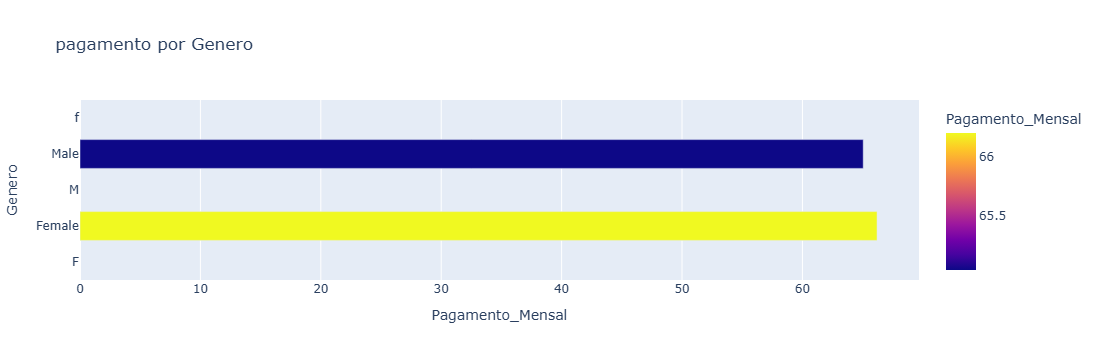

In [21]:
# Vamos fazer uma analise para ver a média e mediana do pagamento mensal por genero, já que não temos nada sobre países
pagamento_mensal=df.groupby("Genero")["Pagamento_Mensal"].mean().reset_index()
fig = px.bar(pagamento_mensal, x="Pagamento_Mensal", y="Genero", orientation="h",
             title="pagamento por Genero",
             labels={"Pagamento_Mensal": "Pagamento_Mensal", "Genero": "Genero"},
             color="Pagamento_Mensal",
             width=800)   
fig.show()

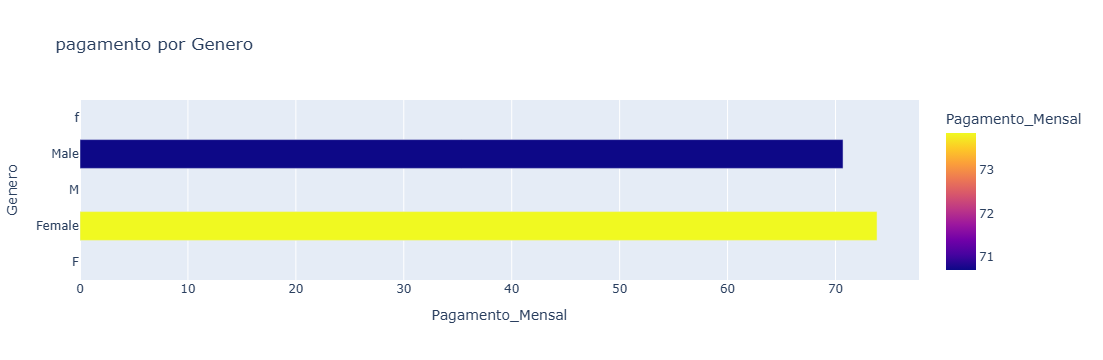

In [22]:
pagamento_mensal=df.groupby("Genero")["Pagamento_Mensal"].median().reset_index()
fig = px.bar(pagamento_mensal, x="Pagamento_Mensal", y="Genero", orientation="h",
             title="pagamento por Genero",
             labels={"Pagamento_Mensal": "Pagamento_Mensal", "Genero": "Genero"},
             color="Pagamento_Mensal",
             width=800) 
fig.show()

**Vemos que a média e mediana não tem grandes diferenças, apenas leves desvios.** 
**Vemos que a mediana está um pouco acima, como geralmente é, então vamos trabalhar com ela** 

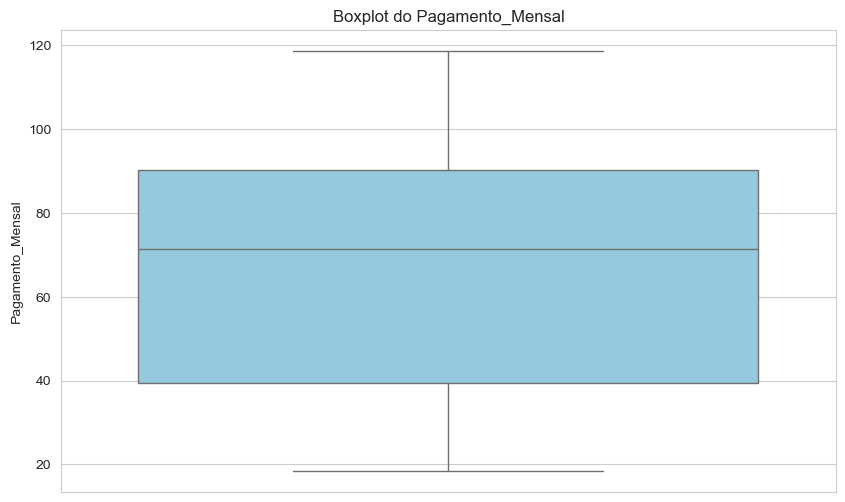

In [25]:
# Vamos fazer um boxplot para analisar melhor o problema
sns. set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y="Pagamento_Mensal", color="skyblue")
plt.title("Boxplot do Pagamento_Mensal")
plt.ylabel("Pagamento_Mensal")
plt.show()            

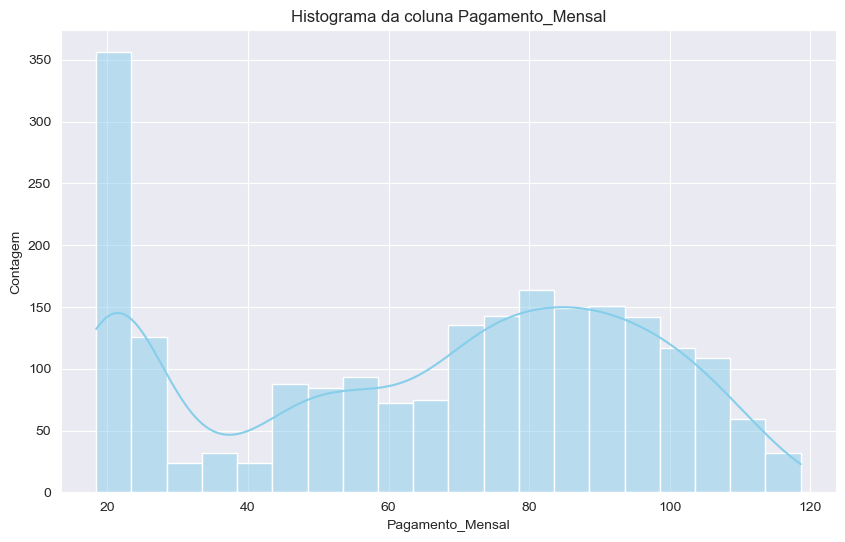

In [26]:
sns.set_style("darkgrid")

# Plotando um histograma dos Pagamento_Mensal para analisarmos a distribuição dos dados
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Pagamento_Mensal", bins=20, kde=True, color="skyblue")
plt.title("Histograma da coluna Pagamento_Mensal")
plt.xlabel("Pagamento_Mensal")
plt.ylabel("Contagem")

plt.show()     

**Vemos que não  se tem outliers por aqui, apenas pouca distribuição nos pagamentos mais caros, como de 100 á 115 reais.**

**Com isso, vamos usar a mediana para substituir os valores nulos nessa categoria.**

In [35]:
Pagamento_Mensal_abaixo_150reais = df[df["Pagamento_Mensal"] < 115]
Pagamento_Mensal_abaixo_150reais["Pagamento_Mensal"].median()

70.92500000000001

In [36]:
# Vamos substituri os dados faltantes pela mediana
mediana_Pagamento_Mensal_abaixo_150reais = df[df["Pagamento_Mensal"] < 115]["Pagamento_Mensal"].median()
df["Pagamento_Mensal"].fillna(mediana_Pagamento_Mensal_abaixo_150reais, inplace=True)

In [37]:
df["Pagamento_Mensal"].isnull().sum()

0

**Vamos ver como estão as coisas agora.**

In [38]:
(df.isnull().sum() / len(df)) * 100

customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
PhoneService          59.565916
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal       0.000000
Total_Pago             0.000000
Churn                  0.000000
dtype: float64

In [39]:
df["PhoneService"].median()

TypeError: Cannot convert ['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes'] to numeric

**Como não posso converter os dados da categoria "PhoneService" pelo fato de ter valores nulos, vamos substituir para float,**
**Assim podemos pelo menos trabalhar com a média e a mediana dessa categoria.**

In [40]:
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0, "NaN": 2})

**Podemos ver que abaixo já mostra que a categoria "PhoneService" virou um float**

In [42]:
df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService          float64
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

In [43]:
df["PhoneService"].mean()

0.9145129224652088

In [44]:
df["PhoneService"].median()

1.0

**Vemos que a média e mediana são quase iguais, não muda quase nada.**

Text(0.5, 1.0, 'Histograma com valores gerais')

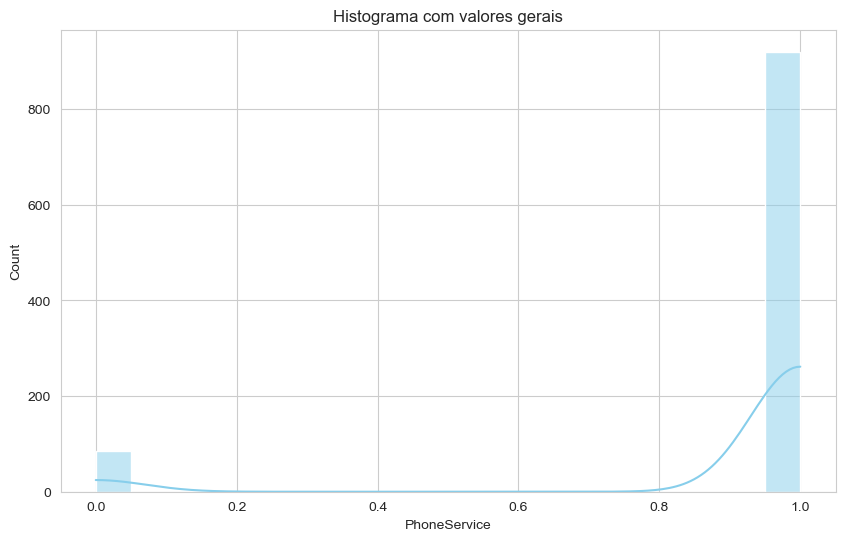

In [85]:
# Vamos fazer vuma analise 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="PhoneService", bins=20, kde=True, color="skyblue")
plt.title("Histograma com valores gerais")

Text(0.5, 1.0, 'Histograma apenas com valores nulos')

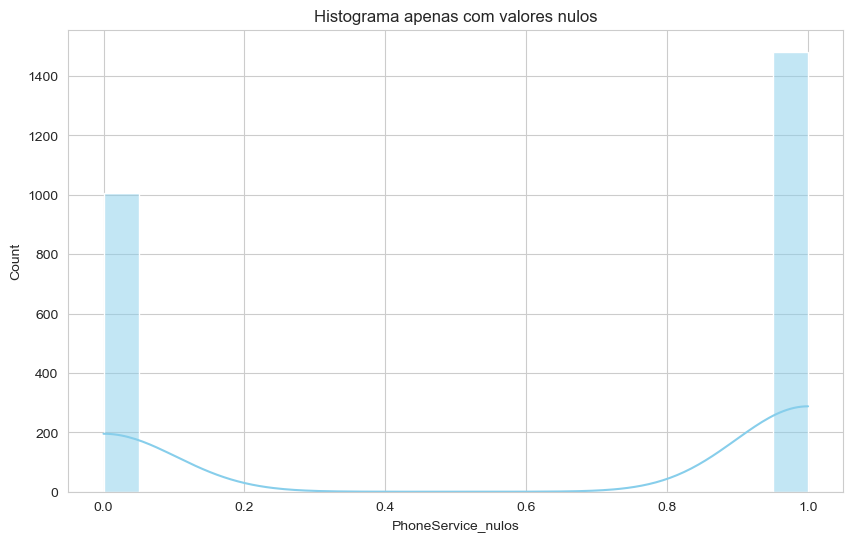

In [86]:
df["PhoneService_nulos"] = df["PhoneService"].isnull()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="PhoneService_nulos", bins=20, kde=True, color="skyblue")
plt.title("Histograma apenas com valores nulos")

**Vemos que a maioria dos dados nulos são "1.0" e a menoria "0.0", já nos dados em geral A maioria também é "1.0" e a menoria é "0.0", então por conta disso acredito que o ideal seria substituir esses dados nulos pela mediana, já que a maiora deles são "1.0" no geral. Vejo que isso não ira afetar uma analise la na frente.**

**Acredito que no geral seria o ideal excluir esses dados caso os nulos fossem vistos apenas em uma quantia pequena, por exemplo: se os valores nulos a maioria fosse "0.0" e depois que nós olhassemos os dados em gerais a menoria fosse "0.0" acredito que ai sim seria o ideal para excluir, pórem vemos que boa aparte dos dados nulos e dados gerais a maioria é "1.0", então o ideal é substituir.**  

In [90]:
mediana_phone_service = df["PhoneService"].median()
df["PhoneService"].fillna(mediana_phone_service, inplace=True)


C:\Users\Facundo Atahides\AppData\Local\Temp\ipykernel_30100\3791139294.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [91]:
# Vamos ver se tudo deu certo agora 
(df.isnull().sum() / len(df)) * 100

customerID            0.0
Genero                0.0
Idoso                 0.0
Casado                0.0
Dependents            0.0
Tempo_como_Cliente    0.0
PhoneService          0.0
Servico_Internet      0.0
Servico_Seguranca     0.0
Suporte_Tecnico       0.0
StreamingTV           0.0
Tipo_Contrato         0.0
PaymentMethod         0.0
Pagamento_Mensal      0.0
Total_Pago            0.0
Churn                 0.0
PhoneService_null     0.0
PhoneService_nulos    0.0
dtype: float64

In [92]:
# Vamos ver como etsá a mediana agora
df["PhoneService"].median()

1.0

**Vemos que mesmo com a substituições não mudou nada a mediana**

# 3 - Vamos verificar se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo valores porém escritos de forma diferente e corrijir.

In [94]:
# Vamos traduzir algumas categorias
df.rename(columns={"PaymentMethod": "Forma_Pagamento"}, inplace=True)
df.rename(columns={"PhoneService": "Servico_Telefonico"}, inplace=True)          
df.rename(columns={"Dependents": "Dependentes"}, inplace=True)          

In [101]:
# Arrumando coluna de genero 
df["Genero"] = df["Genero"].replace("f", "Female", regex=False)
df["Genero"] = df["Genero"].replace("F", "Female", regex=False)
df["Genero"] = df["Genero"].replace("M", "Male", regex=False)
df["Genero"] = df["Genero"].replace("female", "Female", regex=False)

In [102]:
# Vamos ver se agora está tudo ok 
df["Genero"].unique()

array(['Female', 'Male'], dtype=object)

**Você deve estar se perguntando o motivo de eu não ter checado a coluna customerID.
Bem, nome acaba sendo um dado sensível e pense, em uma base com tantos dados não será importante para nós a coluna de nomes ou customerID, podemos inclusive retirar da nossa base.**

# É muito importante que antes de avançar em projetos assim, temos que remover todas as colunas que não serão importantes!

In [108]:
df.drop(columns=['customerID'], inplace=True)
df.drop(columns=['PhoneService_nulos'], inplace=True)
df.drop(columns=['PhoneService_null'], inplace=True)

In [109]:
# Vamos ver agor noss novo df e ver se agora tem algum valor nulo nele
df.head(50)

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Forma_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,Female,0,Yes,No,1,0.0,DSL,No,No,No,Month-to-month,Electronic check,29.850,29.85,No
1,Male,0,No,No,34,1.0,DSL,Yes,No,No,One year,Mailed check,56.950,1889.50,No
2,Male,0,No,No,2,1.0,DSL,Yes,No,No,Month-to-month,Mailed check,53.850,108.15,Yes
3,Male,0,No,No,45,0.0,DSL,Yes,Yes,No,One year,Bank transfer (automatic),70.925,1840.75,No
16,Female,0,No,No,52,1.0,No,No internet service,No internet service,No internet service,One year,Mailed check,70.925,1022.95,No
17,Male,0,No,Yes,71,1.0,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),70.925,7382.25,No
18,Female,0,Yes,Yes,10,1.0,DSL,No,Yes,No,Month-to-month,Credit card (automatic),70.925,528.35,Yes
19,Female,0,No,No,21,1.0,Fiber optic,No,No,No,Month-to-month,Electronic check,70.925,1862.90,No
20,Male,1,No,No,1,0.0,DSL,No,No,No,Month-to-month,Electronic check,70.925,39.65,Yes
21,Male,0,Yes,No,12,1.0,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),70.925,202.25,No


In [110]:
df.isnull().sum()

Genero                0
Idoso                 0
Casado                0
Dependentes           0
Tempo_como_Cliente    0
Servico_Telefonico    0
Servico_Internet      0
Servico_Seguranca     0
Suporte_Tecnico       0
StreamingTV           0
Tipo_Contrato         0
Forma_Pagamento       0
Pagamento_Mensal      0
Total_Pago            0
Churn                 0
dtype: int64